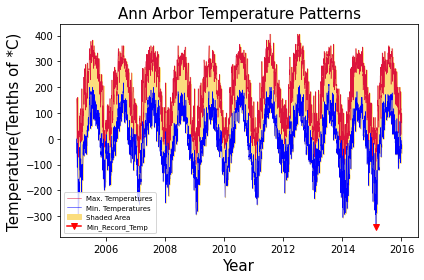

In [6]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import datetime as dt

#Reading the file
df=pd.read_csv('weather.csv')

#creating 2 seperate columns 'Date' and 'year'
df['Date']=pd.to_datetime(df['Date'])
df['year'] = pd.DatetimeIndex(df['Date']).year

#removing leap year days
df = df[~((df.Date.dt.month == 2) & (df.Date.dt.day == 29))]

# In[2]:
#sorting/ordering the whole dataframe with respect to Date(Ascending)
df=df.sort_values(by=['Date'])


# In[3]:
#creating another dataframe 'rec_high' containing the record high temperatures from a mixture of record high and record low temperatures.
rec_high=df.where(df['Element']=='TMAX')


# In[4]:
#dropping all the rows with no values in them.(basically all the rows which have 'TMIN' i.e. temperature minimum in the main dataframe)
rec_high=rec_high.dropna()


# In[5]:
#creating another dataframe 'rec_low' containing the record low temperatures from a mixture of record high and record low temperatures.
rec_low=df.where(df['Element']=='TMIN')
#dropping all the rows with no values in them.(basically all the rows which have 'TMAX' i.e. temperature minimum in the main dataframe)
rec_low.dropna(inplace=True)


# In[6]:
#we group the dataframe by the column 'Date' and take the maximum temperature of the whole day.
rec_high=rec_high.groupby('Date')['Data_Value'].max()
#we group the dataframe by the column 'Date' and take the minimum temperature of the whole day.
rec_low=rec_low.groupby('Date')['Data_Value'].min()


# In[7]:
#notice above that rec_high and rec_low are both series now.
#so we convert both of them to dataframe with the help of .to_frame() function.
rec_high=rec_high.to_frame()
rec_low=rec_low.to_frame()


# In[8]:
#right now date itself is the index and hence we can't operate on it.
#so we reset he index. Now, the date have a seperate column.
rec_high.reset_index(inplace=True)
rec_low.reset_index(inplace=True)


# In[9]:
#now we make a new column 'Year' to store the year of the date.
rec_high['Year']=pd.DatetimeIndex(rec_high['Date']).year
rec_low['Year']=pd.DatetimeIndex(rec_low['Date']).year


# In[10]:
#We make a series 'date' which contains all the unique dates without any repetition.
date=df['Date'].unique()


# In[11]:

#Now, we take date to be the x-axis and Minimum and Maximum temperatures to be on the y-axis and plot 2 line graphs.
plt.plot(date,rec_high['Data_Value'],color='#DC143C',label='Max. Temperatures',linewidth=0.5)
plt.plot(date,rec_low['Data_Value'],color='b',label='Min. Temperatures',linewidth=0.5)

#We shade the are between the 2 line plots.
plt.fill_between(date,rec_high['Data_Value'],rec_low['Data_Value'],label='Shaded Area',color='#FBDD7E',interpolate=True)

#Now we update rec_high and rec_low to contain only the data  pertaining the year 2015.
filt= (rec_high["Year"]==2015)
rec_high=rec_high[filt]

filt= (rec_low["Year"]==2015)
rec_low=rec_low[filt]

#We store the minimum record breaking temperature of 2015 in y and its corresponding date in 'y'.
filt=rec_low['Data_Value']== rec_low['Data_Value'].min()
x=rec_low[filt]['Date']
y=rec_low[filt]['Data_Value']

#Now we plot the record minimum temperature that was broken in 2015.
plt.plot(x,y,marker='v',c='r',label='Min_Record_Temp')

#setting legend,title of the graph, naming x and y axis, fit the whole graph so that its visible completely and does not get cut with tight_layout().
plt.legend(fontsize=7)
plt.title("Ann Arbor Temperature Patterns",fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Temperature(Tenths of *C)",fontsize=15)
plt.tight_layout()